# <center>Burning Model</center>

The Burning Algorithm is a type of percolation process. It provides a simulation of dynamic spread of some phenomenon across a network lattice. It uses an analogy of forest fire, where we initiate one grid as a tree and we simulate how far the fire is able to spread.

In this section we take introduced before <i>ProbabilitySite</i> object and inherit from it to get the grid with occupied and unoccupied sites.
<ul>
    <li>We initiate by setting on fire top row of a grid</li>
    <li>In each step we try to set on fire adjacent sites that are occupied</li>
    <li>We keep going until the fire stops or it gets to the last row of a grid</li>
</ul>

If fire reaches the last row it means that percolation happend. Let's implement it in a code.

In [1]:
from BurningModel.BurningModel import BurningModel
from matplotlib import pyplot as plt
import ipywidgets
%matplotlib inline

First we create the <i>BurningModel</i> object

In [2]:
L = 10
p = 0.6
burning_model = BurningModel(L=L, p=p)

Let's quickly see, how the whole percolation process affects our grid numerically:

Text(0.5, 1.0, 'Percolation for $L = 10$ and $p = 0.6$')

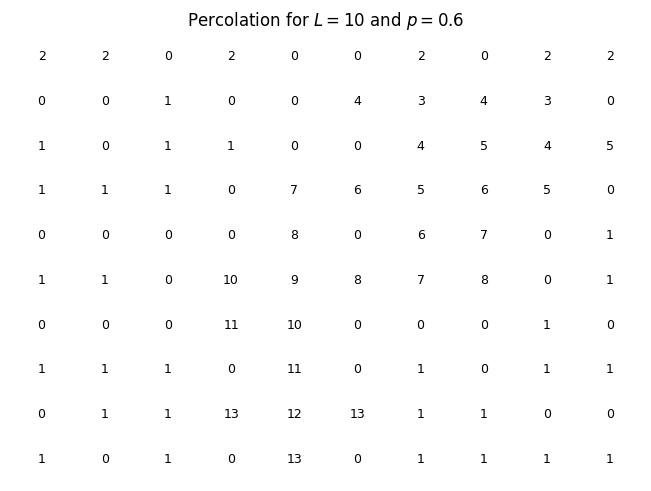

In [3]:
# burning_model.grid_thresholding()
# burning_model.set_top_row_to_initial_value()
burning_model.burning_model()
figure1, axes1 = plt.subplots(1, 1, layout='constrained')
burning_model.plot_grid_as_matrix(matrix=burning_model.get_current_grid(), axes=axes1)
axes1.set_title(f'Percolation for $L = {L}$ and $p = {p}$')

We can see that after each step to occupy neighbours the number increases and it gets as far as it can. Thanks to that we can easilly extract the number of steps for percolation and if it reached the end of the grid. Let's see now how the grid looks after initialization, a couple of steps and at the end of the process.

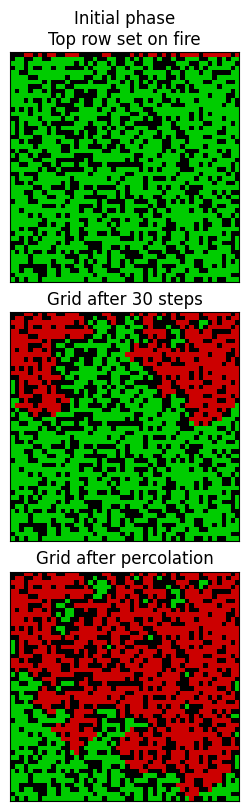

In [4]:
L = 50
p = 0.65
figure2, axes2 = plt.subplots(3, 1, layout='constrained')
burning_model = BurningModel(L=L, p=p)
burning_model.grid_thresholding()

# first graph
burning_model.set_top_row_to_initial_value()
burning_model.plot_percolation(ax=axes2[0])
axes2[0].set_title(f'Initial phase\nTop row set on fire')

# second graph
number_of_steps = 30
for _ in range(number_of_steps):
    burning_model.another_burning_step()
burning_model.plot_percolation(ax=axes2[1])
axes2[1].set_title(f'Grid after {number_of_steps} steps')

# third graph
burning_model.burning_model(reset_grid=True, initial_grid=burning_model.get_initial_grid())
burning_model.plot_percolation(ax=axes2[2])
axes2[2].set_title(f'Grid after percolation')

figure2.set_size_inches(4, 8)

Now let's create an interactive plot to see the whole process step by step

In [5]:
model_dictionary = {
    50: BurningModel(L=50),
    100: BurningModel(L=100),
    150: BurningModel(L=150),
    200: BurningModel(L=200)
}

In [6]:
def plot_percolation(model_dict, L=50, probability=0.5, step=2):
    model = model_dict[L]
    model.change_probability(probability)
    model.grid_thresholding()
    model.set_top_row_to_initial_value()
    for _ in range(step - 2):
        model.another_burning_step()
    figure, axes = plt.subplots(1, 1, layout='constrained')
    model.plot_percolation(ax=axes)

In [9]:
ipywidgets.interact(plot_percolation, 
                    model_dict=ipywidgets.fixed(model_dictionary),
                    L=[50, 100, 150, 200],
                    probability=(0, 0.99, 0.01),
                    step=(2, 600, 1))

interactive(children=(Dropdown(description='L', options=(50, 100, 150, 200), value=50), FloatSlider(value=0.5,…

<function __main__.plot_percolation(model_dict, L=50, probability=0.5, step=2)>

By repeating the same process many times wee can estimate the percolation probability and plot it on a graph

In [28]:
import numpy as np

In [29]:
def plot_percolation_probability(L=10, t=15):
    percolation_probability = 0.592
    burning_model_mean = BurningModel(L=L)
    probability_space = np.linspace(0.45, 0.8, 15)
    percolation_space = np.zeros(len(probability_space))
    for index, probability in enumerate(probability_space):
        burning_model_mean.change_probability(probability)
        burning_model_mean.t_percolation_trials(trials=t)
        percolation_space[index] = burning_model_mean.get_percolation_probability()

    figure, axes = plt.subplots(1, 1, layout='constrained')
    axes.plot(probability_space, percolation_space, color='black')
    axes.axvline(x=percolation_probability, 
                 color='blue', 
                 linestyle='--', 
                 label=f'$p_c$ = {percolation_probability}')
    axes.grid()
    axes.legend(loc='upper left')
    axes.set_title(f'Percolation probability based on {t} number of trials')
    axes.set(xlabel='site probability', ylabel='percolation probability')

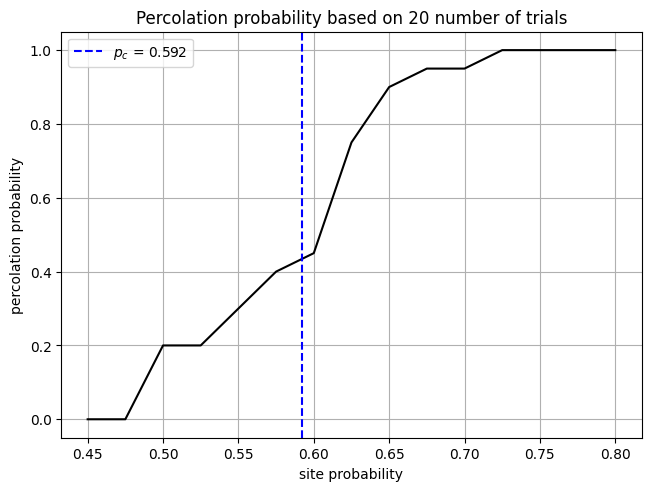

In [31]:
plot_percolation_probability(L=20, t=20)

And let's check it out on interactive plot (for high L and t plotting takes noticeably more time):

In [33]:
ipywidgets.interact(plot_percolation_probability, L=(5, 100, 5), t=(5, 50, 5))

interactive(children=(IntSlider(value=10, description='L', min=5, step=5), IntSlider(value=15, description='t'…

<function __main__.plot_percolation_probability(L=10, t=15)>

We can notice that for increasing value of $L$ the lines becomes steeper near critical probability and increased number of trials makes the line smoother. Below wee can see graphs generated for larger $L$ and $t$.

![L500](./BurningModel/images/PercolationGraphL500p-0.5-0.6-0.7.png)

![L1000](./BurningModel/images/PercolationGraphL1000p-0.5-0.6-0.7.png)

![Plot](./BurningModel/images/PercolationPlotT10000L-100-50-10.png)